In [1]:
!pip install statsmodels pandas numpy matplotlib tqdm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from tqdm import tqdm

In [4]:
# ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÍ≤Ω Í∞ÄÎä•)
data = pd.read_csv("index.csv", parse_dates=["Date"], index_col="Date")

# ÌïÑÏöîÌïú Î≥ÄÏàò ÏÑ†ÌÉù
cols = ["Banks", "Insurance", "Securities"]
data = data[cols].dropna()

# Rolling window ÌÅ¨Í∏∞ ÏÑ§Ï†ï (Ïòà: 5ÎÖÑ Îã®ÏúÑ = 60Í∞úÏõî)
window_size = 365
step_size = 30  # 1Í∞úÏõî Îã®ÏúÑ Ïù¥Îèô

# Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ Í∞úÏàò Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
trace_stat_results = []
p_value_results = []
rolling_dates = []

In [7]:
# Rolling Window Î∂ÑÏÑù ÏßÑÌñâ
for start in tqdm(range(0, len(data) - window_size, step_size)):
    end = start + window_size
    rolling_dates.append(data.index[end])  # Î∂ÑÏÑù Ï¢ÖÎ£å ÏãúÏ†ê Í∏∞Î°ù

    # ÌòÑÏû¨ ÏúàÎèÑÏö∞Ïùò Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    rolling_data = data.iloc[start:end]

    # Johansen Cointegration Test Ïã§Ìñâ
    test_result = coint_johansen(rolling_data, det_order=1, k_ar_diff=1)

    # Trace Statistic Ï†ÄÏû• (r=0, Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏóÜÏùåÏóê ÎåÄÌïú Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ)
    trace_stat = test_result.lr1[0]
    trace_stat_results.append(trace_stat)

    # Trace TestÏùò p-value Ï†ÄÏû• (Í∑ÄÎ¨¥Í∞ÄÏÑ§: Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏóÜÏùå)
    p_value = test_result.cvt[0, 1]  # 5% Ïú†ÏùòÏàòÏ§Ä ÏûÑÍ≥ÑÍ∞í
    p_value_results.append(1 if trace_stat > p_value else 0)  # Í∏∞Í∞Å Ïó¨Î∂Ä (1Ïù¥Î©¥ Í∏∞Í∞Å, Ï¶â Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ Ï°¥Ïû¨)

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ÄÏû•
rolling_results = pd.DataFrame({"Date": rolling_dates, "Trace Stat": trace_stat_results, "Cointegration Exists": p_value_results})
rolling_results.set_index("Date", inplace=True)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 293/293 [00:01<00:00, 200.07it/s]


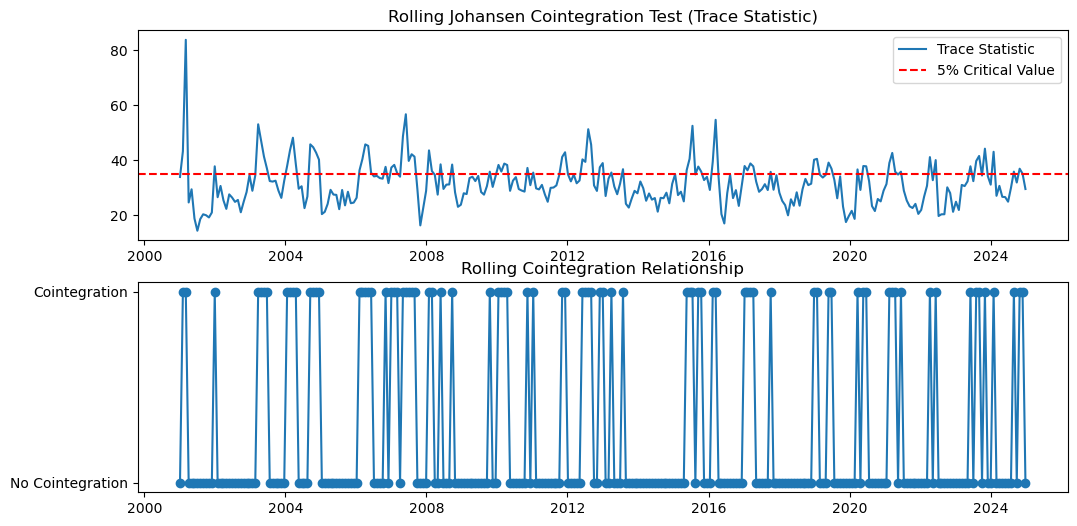

In [9]:
plt.figure(figsize=(12, 6))

# Trace Statistic Plot
plt.subplot(2,1,1)
plt.plot(rolling_results.index, rolling_results["Trace Stat"], label="Trace Statistic")
plt.axhline(y=test_result.cvt[0, 1], color="r", linestyle="--", label="5% Critical Value")
plt.title("Rolling Johansen Cointegration Test (Trace Statistic)")
plt.legend()

# Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ Ïó¨Î∂Ä Plot
plt.subplot(2,1,2)
plt.plot(rolling_results.index, rolling_results["Cointegration Exists"], marker="o", linestyle="-")
plt.yticks([0, 1], labels=["No Cointegration", "Cointegration"])
plt.title("Rolling Cointegration Relationship")

# Í∑∏ÎûòÌîÑ Ï†ÄÏû• (PNG ÌòïÏãù)
plt.savefig("plot1.png", dpi=600, bbox_inches="tight")
plt.show()

In [6]:
############################################################

In [7]:
# ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÍ≤Ω Í∞ÄÎä•)
data = pd.read_csv("index.csv", parse_dates=["Date"], index_col="Date")

# ÌïÑÏöîÌïú Î≥ÄÏàò ÏÑ†ÌÉù
cols = ["Banks", "Insurance", "Securities"]
data = data[cols].dropna()

# Rolling window ÌÅ¨Í∏∞ ÏÑ§Ï†ï (Ïòà: 5ÎÖÑ Îã®ÏúÑ = 60Í∞úÏõî)
window_size = 730
step_size = 60  # 1Í∞úÏõî Îã®ÏúÑ Ïù¥Îèô

# Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ Í∞úÏàò Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
trace_stat_results = []
p_value_results = []
rolling_dates = []

In [8]:
# Rolling Window Î∂ÑÏÑù ÏßÑÌñâ
for start in tqdm(range(0, len(data) - window_size, step_size)):
    end = start + window_size
    rolling_dates.append(data.index[end])  # Î∂ÑÏÑù Ï¢ÖÎ£å ÏãúÏ†ê Í∏∞Î°ù

    # ÌòÑÏû¨ ÏúàÎèÑÏö∞Ïùò Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    rolling_data = data.iloc[start:end]

    # Johansen Cointegration Test Ïã§Ìñâ
    test_result = coint_johansen(rolling_data, det_order=1, k_ar_diff=1)

    # Trace Statistic Ï†ÄÏû• (r=0, Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏóÜÏùåÏóê ÎåÄÌïú Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ)
    trace_stat = test_result.lr1[0]
    trace_stat_results.append(trace_stat)

    # Trace TestÏùò p-value Ï†ÄÏû• (Í∑ÄÎ¨¥Í∞ÄÏÑ§: Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏóÜÏùå)
    p_value = test_result.cvt[0, 1]  # 5% Ïú†ÏùòÏàòÏ§Ä ÏûÑÍ≥ÑÍ∞í
    p_value_results.append(1 if trace_stat > p_value else 0)  # Í∏∞Í∞Å Ïó¨Î∂Ä (1Ïù¥Î©¥ Í∏∞Í∞Å, Ï¶â Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ Ï°¥Ïû¨)

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ÄÏû•
rolling_results = pd.DataFrame({"Date": rolling_dates, "Trace Stat": trace_stat_results, "Cointegration Exists": p_value_results})
rolling_results.set_index("Date", inplace=True)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 140/140 [00:00<00:00, 228.88it/s]


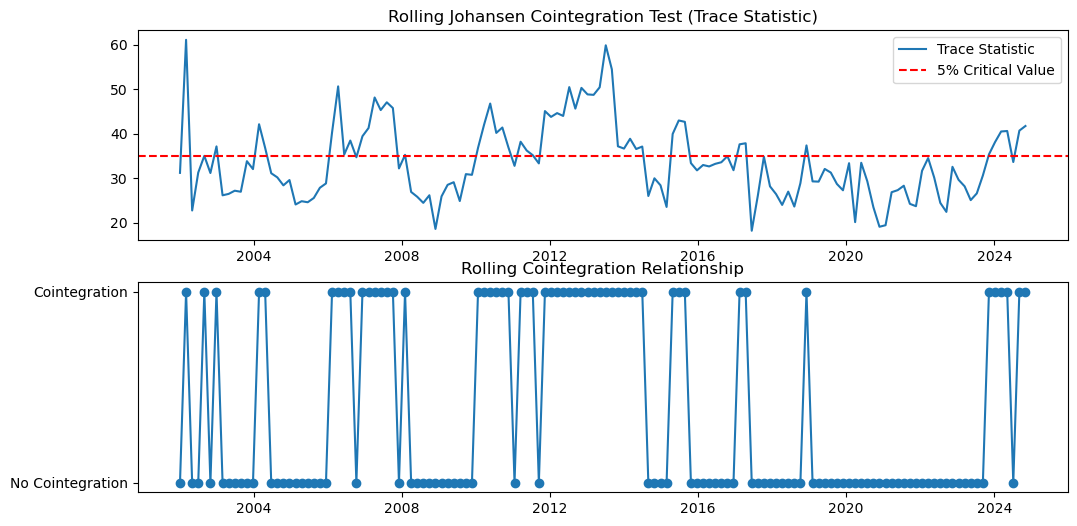

In [9]:
plt.figure(figsize=(12, 6))

# Trace Statistic Plot
plt.subplot(2,1,1)
plt.plot(rolling_results.index, rolling_results["Trace Stat"], label="Trace Statistic")
plt.axhline(y=test_result.cvt[0, 1], color="r", linestyle="--", label="5% Critical Value")
plt.title("Rolling Johansen Cointegration Test (Trace Statistic)")
plt.legend()

# Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ Ïó¨Î∂Ä Plot
plt.subplot(2,1,2)
plt.plot(rolling_results.index, rolling_results["Cointegration Exists"], marker="o", linestyle="-")
plt.yticks([0, 1], labels=["No Cointegration", "Cointegration"])
plt.title("Rolling Cointegration Relationship")

# Í∑∏ÎûòÌîÑ Ï†ÄÏû• (PNG ÌòïÏãù)
plt.savefig("plot.png", dpi=600, bbox_inches="tight")
plt.show()

In [3]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(data)
selected_lag = model.select_order(maxlags=50)  # ÏµúÎåÄ 20ÏãúÏ∞® Í≥†Î†§
print(selected_lag.summary())


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        39.48       39.48   1.393e+17       39.48
1        21.84      21.85*   3.058e+09       21.84
2        21.84       21.85   3.048e+09      21.84*
3        21.84       21.86   3.046e+09       21.85
4        21.84       21.87   3.043e+09       21.85
5        21.83       21.87   3.035e+09       21.85
6        21.83       21.88   3.036e+09       21.85
7        21.83       21.88   3.032e+09       21.85
8        21.83       21.89   3.025e+09       21.85
9        21.83       21.89   3.021e+09       21.85
10       21.83       21.90   3.024e+09       21.85
11       21.83       21.91   3.027e+09       21.86
12       21.83       21.92   3.025e+09       21.86
13      21.83*       21.92  3.019e+09*       21.86
14       21.83       21.93   3.021e+09       21.86
15       21.83       21.94   3.024e+09       21.87
16       21.83       21.95   3.

In [4]:
from statsmodels.tsa.vector_ar.vecm import CointRankResults

# Johansen Í≤ÄÏ†ï ÏàòÌñâ
test_result = coint_johansen(data, det_order=1, k_ar_diff=selected_lag.aic)

# Í≥µÏ†ÅÎ∂Ñ Í≥ÑÏàò ÌôïÏù∏
print(test_result.lr1)  # Trace statistic
print(test_result.cvt)  # Critical values

# ÌäπÏ†ï Î≥ÄÏàòÎßåÏúºÎ°ú ÎπÑÏÑ†Ìòï Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï (Engle-Granger Test)
from statsmodels.tsa.stattools import coint
coint_test = coint(data["Banks"], data["Securities"])
print("Engle-Granger Test p-value:", coint_test[1])  # p-value ÌôïÏù∏


[39.2046823  19.15254228  6.66906115]
[[32.0645 35.0116 41.0815]
 [16.1619 18.3985 23.1485]
 [ 2.7055  3.8415  6.6349]]
Engle-Granger Test p-value: 0.0015647450238056085


In [5]:
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM

# ÏµúÏ†Å ÏãúÏ∞® ÏÑ§Ï†ï (Lag=9)
lag_order = 13

# Í≤∞Í≥º Ï†ÄÏû•Ìï† ÌååÏùºÎ™Ö
output_file = "model_results.txt"

# ÌååÏùºÏóê Ï†ÄÏû•ÌïòÎäî Ìï®Ïàò
def save_output_to_file(output_str, filename):
    with open(filename, "a", encoding="utf-8") as f:  # "a" Î™®Îìú: Í∏∞Ï°¥ ÎÇ¥Ïö© Ïú†ÏßÄÌïòÍ≥† Ï∂îÍ∞Ä Ï†ÄÏû•
        f.write(output_str + "\n\n")

# VAR Î™®Îç∏ ÏÑ§Ï†ï
var_model = VAR(data)
var_result = var_model.fit(lag_order)
print(var_result.summary())

# VECM Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï (Johansen Test)
coint_test = coint_johansen(data, det_order=1, k_ar_diff=lag_order)
print("Trace Statistic:", coint_test.lr1)
print("Critical Values:", coint_test.cvt)

coint_results = f"Trace Statistic:\n{coint_test.lr1}\n\nCritical Values:\n{coint_test.cvt}"
save_output_to_file("=== Johansen Cointegration Test ===\n" + coint_results, output_file)
print("Johansen Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Í≤∞Í≥ºÍ∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

# VECM Î™®Îç∏ ÏÑ§Ï†ï
vecm_model = VECM(data, k_ar_diff=lag_order-1, coint_rank=2)
vecm_result = vecm_model.fit()
print(vecm_result.summary())


# VECM Í≤∞Í≥º Ï†ÄÏû•
vecm_summary = vecm_result.summary().as_text()
save_output_to_file("=== VECM Model Results ===\n" + vecm_summary, output_file)
print("VECM Î™®Îç∏ Í≤∞Í≥ºÍ∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Mar, 2025
Time:                     19:04:47
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    21.9231
Nobs:                     9115.00    HQIC:                   21.8613
Log likelihood:          -138168.    FPE:                3.02268e+09
AIC:                      21.8294    Det(Omega_mle):     2.98323e+09
--------------------------------------------------------------------
Results for equation Banks
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  6.809360         2.376306            2.866           0.004
L1.Banks               1.056827         0.013744           76.893           0.000
L1.Insurance          -0.020014         0.012382        

In [6]:
print("Trace Statistic:", coint_test.lr1)
print("Critical Values:", coint_test.cvt)

Trace Statistic: [39.2046823  19.15254228  6.66906115]
Critical Values: [[32.0645 35.0116 41.0815]
 [16.1619 18.3985 23.1485]
 [ 2.7055  3.8415  6.6349]]


In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# CSV ÌååÏùº ÏùΩÍ∏∞ (Date Ïª¨ÎüºÏùÑ datetimeÏúºÎ°ú ÌååÏã±)
df = pd.read_csv("index.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)
df.set_index("Date", inplace=True)

# 2024-02-02 Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù
filtered_df = df[df.index >= pd.to_datetime("2024-02-02")]

variables = ["Banks", "Insurance", "Securities"]

for var in variables:
    print(f"ADF test for {var} (with constant) on filtered data:")
    result_const = adfuller(filtered_df[var].dropna(), regression='c')
    print("ADF Statistic:", result_const[0])
    print("p-value:", result_const[1])
    print("Critical Values:")
    for key, value in result_const[4].items():
        print(f"    {key}: {value}")
    print("\n")
    
    print(f"ADF test for {var} (with constant and trend) on filtered data:")
    result_ct = adfuller(filtered_df[var].dropna(), regression='ct')
    print("ADF Statistic:", result_ct[0])
    print("p-value:", result_ct[1])
    print("Critical Values:")
    for key, value in result_ct[4].items():
        print(f"    {key}: {value}")
    print("\n")


ADF test for Banks (with constant) on filtered data:
ADF Statistic: -2.173317736219721
p-value: 0.21607168675694216
Critical Values:
    1%: -3.4503224123605194
    5%: -2.870338478726661
    10%: -2.571457612488522


ADF test for Banks (with constant and trend) on filtered data:
ADF Statistic: -3.369029335951992
p-value: 0.05566541795102286
Critical Values:
    1%: -3.986299950657981
    5%: -3.4237973148195917
    10%: -3.1348741726814358


ADF test for Insurance (with constant) on filtered data:
ADF Statistic: -3.2360255780778098
p-value: 0.017991813555020233
Critical Values:
    1%: -3.4502011472639724
    5%: -2.8702852297358983
    10%: -2.5714292194077513


ADF test for Insurance (with constant and trend) on filtered data:
ADF Statistic: -4.13400928297267
p-value: 0.005619411361421567
Critical Values:
    1%: -3.986299950657981
    5%: -3.4237973148195917
    10%: -3.1348741726814358


ADF test for Securities (with constant) on filtered data:
ADF Statistic: -1.597673248594946
p-

In [14]:
# 2024-02-02 Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù
filtered_data = data[data.index >= pd.to_datetime("2024-02-02")]

# Johansen Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ïÏùÑ ÏúÑÌïú Î≥ÄÏàò ÏÑ†ÌÉù (ÏòàÏãú: 'Insurance', 'Finance', 'Banks')
vars_to_test = filtered_data[['Banks', 'Insurance', 'Securities']]

# Johansen Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï ÏàòÌñâ
# det_order: 0 (ÏÉÅÏàòÌï≠ ÏóÜÏùå) ÎòêÎäî 1 (ÏÉÅÏàòÌï≠ Ìè¨Ìï®) Îì±, k_ar_diff: Ï∞®Î∂ÑÏóê ÏÇ¨Ïö©Ìï† lag Ïàò (Ïòà: 1)
johansen_result = coint_johansen(vars_to_test, det_order=0, k_ar_diff=1)

# Í≤∞Í≥º Ï∂úÎ†•: Í≥†Ïú†Í∞í, trace statistic, Í∑∏Î¶¨Í≥† ÏûÑÍ≥ÑÍ∞í(90%, 95%, 99%)
print("Eigenvalues:")
print(johansen_result.eig)
print("\nTrace Statistic:")
print(johansen_result.lr1)
print("\nCritical Values (90%, 95%, 99%):")
print(johansen_result.cvt)

Eigenvalues:
[0.05475129 0.02355665 0.00490227]

Trace Statistic:
[28.15488299  9.51720097  1.626643  ]

Critical Values (90%, 95%, 99%):
[[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


In [48]:
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR

# 1. CSV ÌååÏùº ÏùΩÍ∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨
df = pd.read_csv("index.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)
df.set_index("Date", inplace=True)

# 2. 2024-02-02 Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù
filtered_df = df[df.index >= pd.to_datetime("2024-02-02")]

# 3. VAR Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù
vars_to_use = ["Banks", "Insurance", "Securities"]
data_vars = filtered_df[vars_to_use]

# 4. 1Ï∞® Ï∞®Î∂Ñ (Ï≤´ Î≤àÏß∏ Ï∞®Î∂Ñ ÌõÑ Í≤∞Ï∏°Ïπò Ï†úÍ±∞)
diff_data = data_vars.diff().dropna()

# 5. VAR Î™®Ìòï Ï†ÅÌï©
model = VAR(diff_data)

# Lag order ÏûêÎèô ÏÑ†ÌÉù (ÏµúÎåÄ 10 lagsÍπåÏßÄ Í≥†Î†§)
order_results = model.select_order(maxlags=10)
print("Lag order selection summary:")
print(order_results.summary())

# Ïó¨Í∏∞ÏÑúÎäî AIC Í∏∞Ï§ÄÏúºÎ°ú ÏµúÏ†Å lag ÏÑ†ÌÉù (Ïòà: 'aic' ÏÑ†ÌÉù)
#optimal_lag = order_results.selected_orders['aic']
#print(f"\nOptimal lag order (AIC): {optimal_lag}\n")
optimal_lag = 1

model_fit = model.fit(optimal_lag)
print(model_fit.summary())

# 6. Í∞Å Î≥ÄÏàòÎ≥Ñ VAR Î∞©Ï†ïÏãù Ï∂úÎ†•
# model_fit.paramsÎäî Í∞Å Ïó¥Ïù¥ Î∞©Ï†ïÏãù(Ï¢ÖÏÜçÎ≥ÄÏàò)Ïù¥Í≥†,
# ÌñâÏùÄ "const", "L1.Banks", "L1.Insurance", ... Îì±ÏúºÎ°ú Íµ¨ÏÑ±Îê©ÎãàÎã§.
print("\nVAR Equations:")
for var in vars_to_use:
    print(f"\nEquation for {var}:")
    # Í∞Å Î∞©Ï†ïÏãùÏùò Í≥ÑÏàò Ï∂îÏ∂ú (ÏÉÅÏàòÌï≠ Î∞è Í∞Å lagÏùò Í≥ÑÏàò)
    coeffs = model_fit.params[var]
    eq_parts = []
    for param_name, coef in coeffs.items():  # iteritems() ÎåÄÏã† items() ÏÇ¨Ïö©
        eq_parts.append(f"({coef:.4f})*{param_name}")
    equation = f"{var}(t) = " + " + ".join(eq_parts)
    print(equation)

Lag order selection summary:
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       22.90*      22.93*  8.795e+09*      22.91*
1        22.92       23.06   8.990e+09       22.98
2        22.93       23.18   9.121e+09       23.03
3        22.97       23.32   9.460e+09       23.11
4        23.01       23.47   9.889e+09       23.20
5        23.05       23.61   1.027e+10       23.28
6        23.05       23.72   1.029e+10       23.32
7        23.09       23.87   1.072e+10       23.40
8        23.07       23.95   1.050e+10       23.42
9        23.10       24.09   1.081e+10       23.50
10       23.13       24.22   1.115e+10       23.57
--------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Mar, 2025
Time:                     20:51:05
-------------------------------

C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
"""ÏïÑÎûò ÏΩîÎìúÎäî ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º 1Ï∞® Ï∞®Î∂ÑÌïú(diff_data)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ VAR Î™®ÌòïÏùÑ Ï†ÅÌï©ÌïòÍ≥†, 7Ïùº Îã®ÏúÑ Î°§ÎßÅ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïú ÌõÑ ÏòàÏ∏°Îêú Ï∞®Î∂ÑÍ∞íÏùÑ ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú Î≥µÏõêÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÏàòÏ†ïÌïú ÏòàÏãúÏûÖÎãàÎã§.
Ï¶â, Í∞Å ÏòàÏ∏° ÏúàÎèÑÏö∞ÎßàÎã§ 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞(train_data)Î•º ÏÇ¨Ïö©Ìï¥ VAR Î™®ÌòïÏùÑ ÌïôÏäµÌïú ÌõÑ, Ìï¥Îãπ ÏúàÎèÑÏö∞Ïùò ÎßàÏßÄÎßâ Ïã§Ï†ú Í∞í(ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞)ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÎàÑÏ†ÅÌï©ÏùÑ ÎçîÌï¥ Î≥µÏõêÌï©ÎãàÎã§."""

In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR

# 1. CSV ÌååÏùº ÏùΩÍ∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨
df = pd.read_csv("index.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)
df.set_index("Date", inplace=True)

# 2. 2024-02-02 Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù (ÏòàÏ∏° ÎåÄÏÉÅ)
# Ïó¨Í∏∞ÏÑúÎäî Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï§ëÏóêÏÑú ÏÇ¨Ïö©Ìï† Î≥ÄÏàòÎì§ÏùÑ Îã§Î£®ÎØÄÎ°ú,
# ÏòàÏ∏° Í∏∞Í∞ÑÏùÄ forecast_startÎ∂ÄÌÑ∞ forecast_endÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
forecast_start = pd.to_datetime("2024-02-02")
forecast_end   = pd.to_datetime("2024-12-30")

# 3. Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏÑ†ÌÉù (Banks, Insurance, Securities)
vars_to_use = ["Banks", "Insurance", "Securities"]
data_vars = df[vars_to_use]

# 4. 1Ï∞® Ï∞®Î∂Ñ ÏàòÌñâ (Ï≤´ ÌñâÏùÄ NaNÏù¥ÎØÄÎ°ú Ï†úÍ±∞)
diff_data = data_vars.diff().dropna()

In [39]:
# 5. Î°§ÎßÅ ÏòàÏ∏°Î•º ÏúÑÌïú Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
forecast_horizon = 7  # 7Ïùº ahead forecast
all_abs_errors = []   # Í∞Å ÏòàÏ∏° Íµ¨Í∞ÑÏùò Ï†àÎåÄ Ïò§Ï∞®
all_sq_errors  = []   # Í∞Å ÏòàÏ∏° Íµ¨Í∞ÑÏùò Ï†úÍ≥± Ïò§Ï∞®
preds_all      = []   # Î™®Îì† ÏòàÏ∏°Í∞í Ï†ÄÏû• (ÏõêÎûò Ïä§ÏºÄÏùº)
actuals_all    = []   # Î™®Îì† Ïã§Ï†úÍ∞í Ï†ÄÏû• (ÏõêÎûò Ïä§ÏºÄÏùº)
dates_all      = []   # ÏòàÏ∏° Í∏∞Í∞Ñ ÎÇ†Ïßú Ï†ÄÏû•

current_start = forecast_start

while current_start + pd.Timedelta(days=forecast_horizon - 1) <= forecast_end:
    n_steps = forecast_horizon
    current_end = current_start + pd.Timedelta(days=n_steps) - pd.Timedelta(days=1)
    
    # ÏòàÏ∏° Íµ¨Í∞ÑÏù¥ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î≤îÏúÑÎ•º Ï¥àÍ≥ºÌïòÎ©¥ Ï¢ÖÎ£å
    if current_end > df.index[-1]:
        break

    # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞: 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞ Ï§ë, current_start Ïù¥Ï†ÑÍπåÏßÄ ÏÇ¨Ïö©
    train_end = current_start - pd.Timedelta(days=1)
    train_data = diff_data.loc[:train_end]
    
    # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïúÏßÄ ÌôïÏù∏ (Ïòà: ÏµúÏÜå 15Ïùº Ïù¥ÏÉÅ)
    if len(train_data) < 15:
        current_start += pd.Timedelta(days=n_steps)
        continue

    # VAR Î™®Ìòï Ï†ÅÌï©: Í∞ÄÎä•Ìïú ÏµúÎåÄ lag = min(15, n_obs-1)
    model = VAR(train_data)
    n_obs = len(train_data)
    maxlags_val = min(15, n_obs - 1)
    try:
        order_results = model.select_order(maxlags=maxlags_val)
        optimal_lag = order_results.selected_orders['aic']
    except ValueError as e:
        print(f"Skipping window starting at {current_start.date()} due to order selection error: {e}")
        current_start += pd.Timedelta(days=n_steps)
        continue

    if optimal_lag is None or optimal_lag < 1:
        current_start += pd.Timedelta(days=n_steps)
        continue

    model_fit = model.fit(optimal_lag)
    
    # 7Ïùº ahead forecast (Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥)
    try:
        forecast_diff = model_fit.forecast(y=train_data.values[-optimal_lag:], steps=n_steps)
    except Exception as e:
        print(f"Forecasting failed for window starting at {current_start.date()}: {e}")
        current_start += pd.Timedelta(days=n_steps)
        continue
    
    # Î≥µÏõê: train_end ÏãúÏ†êÏùò ÏõêÎ≥∏ Í∞íÏóê ÎàÑÏ†Å Ï∞®Î∂Ñ ÏòàÏ∏°ÏùÑ ÎçîÌï®
    try:
        last_actual = data_vars.loc[train_end].values  # shape: (n_variables,)
    except KeyError:
        current_start += pd.Timedelta(days=n_steps)
        continue

    forecast_cumsum = np.cumsum(forecast_diff, axis=0)
    forecast_values = last_actual + forecast_cumsum  # Î≥µÏõêÎêú ÏòàÏ∏°Í∞í (ÏõêÎûò Ïä§ÏºÄÏùº)
    
    forecast_index = pd.date_range(start=current_start, periods=n_steps, freq='D')
    forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=train_data.columns)
    
    # Insurance Î≥ÄÏàò ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÎπÑÍµê
    predicted_insurance = forecast_df["Insurance"].values
    actual_insurance = data_vars.loc[current_start:current_end, "Insurance"].values
    
    # ÏòàÏ∏° Íµ¨Í∞ÑÏù¥ 7ÏùºÏπòÍ∞Ä ÏïÑÎãàÎùºÎ©¥ Í±¥ÎÑàÎõ∞Í∏∞
    if len(actual_insurance) != n_steps or len(predicted_insurance) != n_steps:
        current_start += pd.Timedelta(days=n_steps)
        continue

    abs_errors = np.abs(predicted_insurance - actual_insurance)
    sq_errors  = (predicted_insurance - actual_insurance) ** 2

    all_abs_errors.extend(abs_errors.tolist())
    all_sq_errors.extend(sq_errors.tolist())
    preds_all.extend(predicted_insurance.tolist())
    actuals_all.extend(actual_insurance.tolist())
    dates_all.extend(forecast_index.tolist())
    
    print(f"Forecast from {current_start.date()} to {current_end.date()} completed.")
    
    current_start += pd.Timedelta(days=n_steps)

C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-02-02 to 2024-02-08 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-02-09 to 2024-02-15 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-02-16 to 2024-02-22 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-02-23 to 2024-02-29 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-03-01 to 2024-03-07 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-03-08 to 2024-03-14 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-03-15 to 2024-03-21 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-03-22 to 2024-03-28 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-03-29 to 2024-04-04 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-04-05 to 2024-04-11 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-04-12 to 2024-04-18 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-04-19 to 2024-04-25 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-04-26 to 2024-05-02 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-05-03 to 2024-05-09 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-05-10 to 2024-05-16 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-05-17 to 2024-05-23 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-05-24 to 2024-05-30 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-05-31 to 2024-06-06 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-06-07 to 2024-06-13 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-06-14 to 2024-06-20 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-06-21 to 2024-06-27 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-06-28 to 2024-07-04 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-07-05 to 2024-07-11 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-07-12 to 2024-07-18 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-07-19 to 2024-07-25 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-07-26 to 2024-08-01 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-08-02 to 2024-08-08 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-08-09 to 2024-08-15 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-08-16 to 2024-08-22 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-08-23 to 2024-08-29 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-08-30 to 2024-09-05 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-09-06 to 2024-09-12 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-09-13 to 2024-09-19 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-09-20 to 2024-09-26 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-09-27 to 2024-10-03 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-10-04 to 2024-10-10 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-10-11 to 2024-10-17 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-10-18 to 2024-10-24 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-10-25 to 2024-10-31 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-11-01 to 2024-11-07 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-11-08 to 2024-11-14 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-11-15 to 2024-11-21 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-11-22 to 2024-11-28 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-11-29 to 2024-12-05 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-12-06 to 2024-12-12 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-12-13 to 2024-12-19 completed.


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast from 2024-12-20 to 2024-12-26 completed.


In [40]:
# ÎßåÏïΩ Î¶¨Ïä§Ìä∏ Í∏∏Ïù¥Í∞Ä Îã§Î•¥Î©¥ ÏµúÏÜå Í∏∏Ïù¥Î°ú ÎßûÏ∂§
min_length = min(len(dates_all), len(preds_all), len(actuals_all))
dates_all = dates_all[:min_length]
preds_all = preds_all[:min_length]
actuals_all = actuals_all[:min_length]


In [41]:
# Ï†ÑÏ≤¥ ÏòàÏ∏° Ïò§Ï∞® ÏßÄÌëú Í≥ÑÏÇ∞
all_abs_errors = np.array(all_abs_errors)
p50 = np.median(all_abs_errors)
p90 = np.percentile(all_abs_errors, 90)
mse = np.mean(np.array(all_sq_errors))
mae = np.mean(all_abs_errors)

print("\n----- Ï†ÑÏ≤¥ ÏòàÏ∏° Ïò§Ï∞® ÏßÄÌëú -----")
print(f"p50 error (Ï§ëÏúÑ Ï†àÎåÄ Ïò§Ï∞®): {p50:.4f}")
print(f"p90 error: {p90:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


----- Ï†ÑÏ≤¥ ÏòàÏ∏° Ïò§Ï∞® ÏßÄÌëú -----
p50 error (Ï§ëÏúÑ Ï†àÎåÄ Ïò§Ï∞®): 143.2089
p90 error: 457.3499
MSE: 64783.4054
MAE: 190.9926


In [42]:
# ÏòàÏ∏° Í≤∞Í≥º DataFrame Íµ¨ÏÑ±
results_df = pd.DataFrame({
    "Date": dates_all,
    "Predicted_Insurance": preds_all,
    "Actual_Insurance": actuals_all
})
results_df.sort_values("Date", inplace=True)

print("\nÏòàÏ∏°Îêú Insurance Í∞í (ÏÉÅÏúÑ 5Í∞ú):")
print(results_df.head())

# CSV ÌååÏùºÎ°ú Ï†ÄÏû•
results_df.to_csv("var_forecast_insurance_1st.csv", index=False)
print("\nÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä 'var_forecast_insurance_1st.csv' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


ÏòàÏ∏°Îêú Insurance Í∞í (ÏÉÅÏúÑ 5Í∞ú):
        Date  Predicted_Insurance  Actual_Insurance
0 2024-02-02          7139.228661           7413.61
1 2024-02-03          7123.968733           7413.61
2 2024-02-04          7111.208576           7413.61
3 2024-02-05          7091.393856           7395.10
4 2024-02-06          7078.767422           7304.45

ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä 'var_forecast_insurance_1st.csv' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [43]:
# Ï†ÑÏ≤¥ ÏòàÏ∏° Ïò§Ï∞® ÏßÄÌëú Í≥ÑÏÇ∞
all_abs_errors = np.array(all_abs_errors)
p50 = np.median(all_abs_errors)
p90 = np.percentile(all_abs_errors, 90)
mse = np.mean(np.array(all_sq_errors))
mae = np.mean(all_abs_errors)

print("\n----- Ï†ÑÏ≤¥ ÏòàÏ∏° Ïò§Ï∞® ÏßÄÌëú -----")
print(f"p50 error (Ï§ëÏúÑ Ï†àÎåÄ Ïò§Ï∞®): {p50:.4f}")
print(f"p90 error: {p90:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


----- Ï†ÑÏ≤¥ ÏòàÏ∏° Ïò§Ï∞® ÏßÄÌëú -----
p50 error (Ï§ëÏúÑ Ï†àÎåÄ Ïò§Ï∞®): 143.2089
p90 error: 457.3499
MSE: 64783.4054
MAE: 190.9926


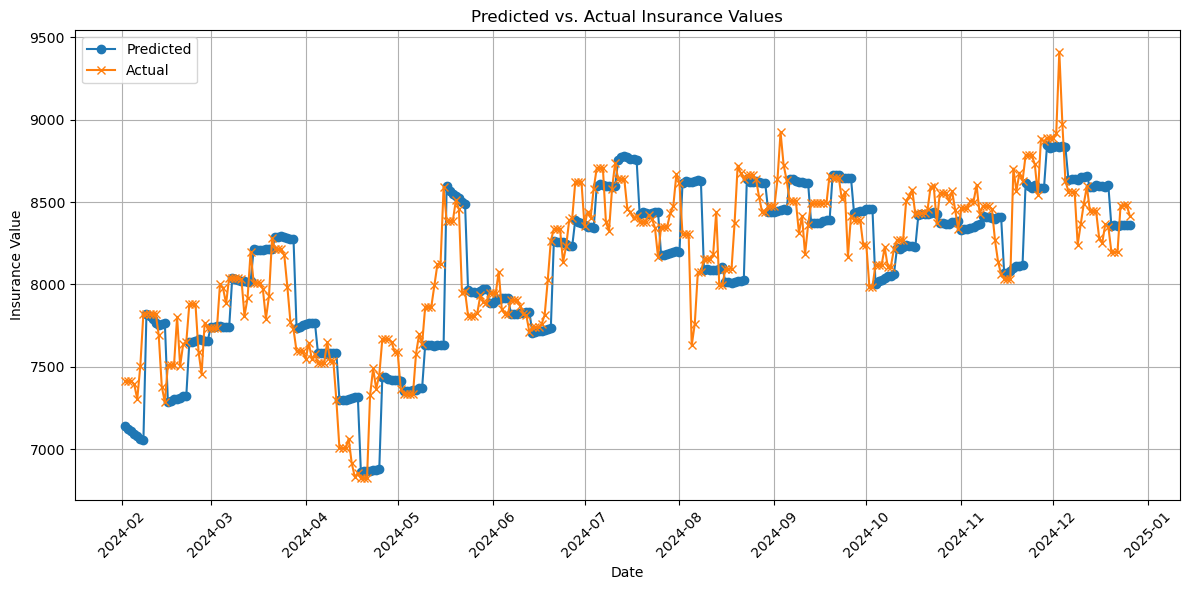

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV ÌååÏùº ÏùΩÍ∏∞ (Date Ïª¨ÎüºÏùÑ datetimeÏúºÎ°ú ÌååÏã±)
df = pd.read_csv("var_forecast_insurance_1st.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Predicted_Insurance"], label="Predicted", marker="o")
plt.plot(df["Date"], df["Actual_Insurance"], label="Actual", marker="x")
plt.xlabel("Date")
plt.ylabel("Insurance Value")
plt.title("Predicted vs. Actual Insurance Values")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Í∑∏ÎûòÌîÑ Ï†ÄÏû•
plt.savefig("predicted_vs_actual_insurance_1st.png", dpi=300, bbox_inches="tight")
plt.show()

In [10]:
"""Ïù¥ÌïòÎäî structural break test code"""

'Ïù¥ÌïòÎäî structural break test code'

In [3]:
!pip install ruptures


   ---------------------------------------- 0.0/474.0 kB ? eta -:--:--
    --------------------------------------- 10.2/474.0 kB ? eta -:--:--
   ---------------------- ----------------- 266.2/474.0 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 474.0/474.0 kB 4.3 MB/s eta 0:00:00


In [5]:
!pip install arch


   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   - -------------------------------------- 30.7/926.2 kB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 450.6/926.2 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------  921.6/926.2 kB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 926.2/926.2 kB 6.5 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from ruptures import Binseg
from arch.unitroot import ZivotAndrews
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [7]:
# üìå Îç∞Ïù¥ÌÑ∞ Î°úÎìú
file_path = "index.csv"
df = pd.read_csv(file_path)

In [8]:
# üìå ÎÇ†Ïßú Î≥ÄÌôò Î∞è Ï†ïÎ†¨
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

In [14]:

# üìå Î∂ÑÏÑùÌï† Ï¢ÖÏÜçÎ≥ÄÏàò ÏÑ§Ï†ï (Ïòà: Finance ÏßÄÏàò)
target_var = ['Banks', 'Insurance', 'Securities']  # Î≥ÄÏàòÎ™ÖÏùÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎßûÍ≤å Ï°∞Ï†ïÌïòÏÑ∏Ïöî

In [15]:

# üìå Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df = df.dropna(subset=[target_var])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 3

In [16]:
# üìå Chow Test ÏàòÎèô Íµ¨ÌòÑ (Îã®Ïùº ÏãúÏ†ê Íµ¨Ï°∞Ï†Å Î≥ÄÎèô Í≤ÄÏ†ï)
def chow_test(data, target_col, t_break):
    """
    ÌäπÏ†ï ÏãúÏ†êÏóêÏÑú Chow TestÎ•º ÏàòÌñâÌïòÏó¨ Íµ¨Ï°∞Ï†Å Î≥ÄÎèô Ïó¨Î∂ÄÎ•º Í≤ÄÏ†ï
    """
    y = data[target_col].values
    X = np.arange(len(data)).reshape(-1, 1)
    X = sm.add_constant(X)  # Ï†àÌé∏ Ï∂îÍ∞Ä

    # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌöåÍ∑Ä
    model_full = sm.OLS(y, X).fit()

    # ÏãúÏ†êÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎàî
    X1, y1 = X[:t_break], y[:t_break]
    X2, y2 = X[t_break:], y[t_break:]

    model1 = sm.OLS(y1, X1).fit()
    model2 = sm.OLS(y2, X2).fit()

    # SSE Í≥ÑÏÇ∞
    sse_full = np.sum(model_full.resid ** 2)
    sse1 = np.sum(model1.resid ** 2)
    sse2 = np.sum(model2.resid ** 2)

    # Chow Test ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞
    k = X.shape[1]  # ÌöåÍ∑Ä Í≥ÑÏàò Í∞úÏàò
    num = (sse_full - (sse1 + sse2)) / k
    denom = (sse1 + sse2) / (len(y) - 2 * k)
    chow_stat = num / denom

    return chow_stat

In [17]:
print(df.columns)


Index(['Date', 'Banks', 'Insurance', 'Securities'], dtype='object')


In [18]:
# üìå ÌäπÏ†ï ÏãúÏ†êÏóêÏÑú Íµ¨Ï°∞Ï†Å Î≥ÄÎèô Í≤ÄÏ†ï (Ïòà: Ï§ëÏïôÍ∞í ÏãúÏ†ê)
t_break = len(df) // 2  # Îç∞Ïù¥ÌÑ∞ Ï§ëÍ∞ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÑ§Ï†ï
chow_stat = chow_test(df, target_var, t_break)
print(f"Chow Test Statistic: {chow_stat}")

Chow Test Statistic: 4106.014553573472


In [20]:
# üìå ÏΩîÎ°úÎÇò19Î°ú Ïù∏Ìïú ÏΩîÏä§Ìîº ÌïòÎùΩ ÏãúÏûë ÏãúÏ†ê ÏÑ§Ï†ï
break_date = pd.Timestamp('2020-02-19')
t_break = df.index[df['Date'] == break_date].tolist()

if t_break:
    t_break = t_break[0]
    chow_stat = chow_test(df, target_var, t_break)
    print(f"Chow Test Statistic at {break_date.date()}: {chow_stat}")
else:
    print(f"Date {break_date.date()} not found in the dataset.")

Chow Test Statistic at 2020-02-19: 2503.1732650164636


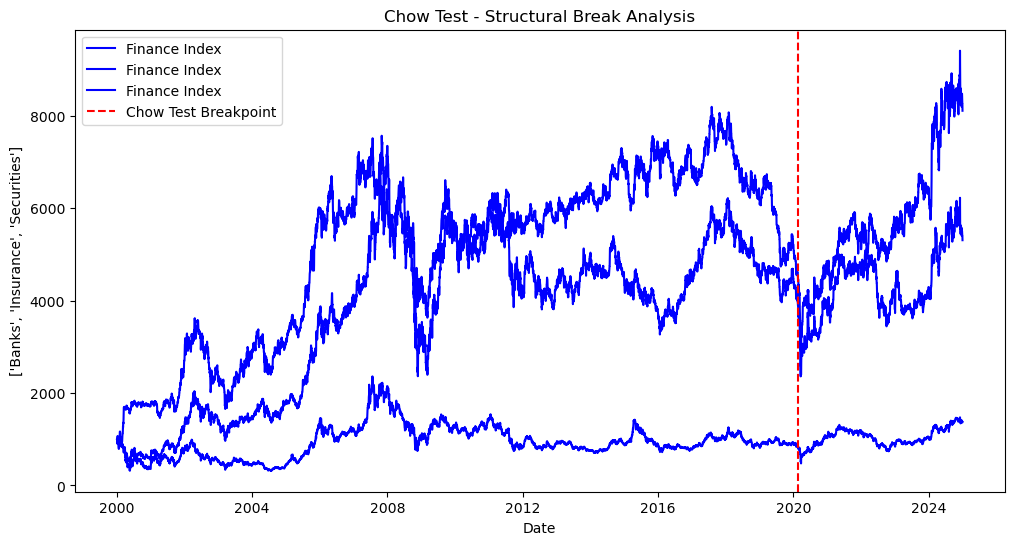

In [21]:
# üìå Chow Test ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df[target_var], label="Finance Index", color='blue')
if t_break:
    plt.axvline(df['Date'].iloc[t_break], color='red', linestyle='--', label="Chow Test Breakpoint")
plt.xlabel("Date")
plt.ylabel(target_var)
plt.title("Chow Test - Structural Break Analysis")
plt.legend()
plt.show()

In [22]:
# üìå Bai-Perron Test Ï†ÅÏö© (Îã§Ï§ë Íµ¨Ï°∞Ï†Å Î≥ÄÎèô Í≤ÄÏ†ï)
algo = Binseg(model="l2").fit(df[target_var].values)
breakpoints = algo.predict(n_bkps=3)  # ÏµúÎåÄ 3Í∞úÏùò Íµ¨Ï°∞Ï†Å Î≥ÄÎèô ÌÉêÏÉâ

print(f"Bai-Perron Detected Breakpoints: {breakpoints}")

Bai-Perron Detected Breakpoints: [2135, 2835, 8795, 9128]


In [27]:
# üìå Î™®Îì† Î≥ÄÏàòÏóê ÎåÄÌï¥ Zivot-Andrews Test ÏàòÌñâ
for col in target_var:
    print(f"\nüìå Zivot-Andrews Test for {col}")
    za_test = ZivotAndrews(df[col])
    print(za_test.summary())



üìå Zivot-Andrews Test for Banks
        Zivot-Andrews Results        
Test Statistic                 -4.116
P-value                         0.283
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.

üìå Zivot-Andrews Test for Insurance
        Zivot-Andrews Results        
Test Statistic                 -4.408
P-value                         0.149
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.

üìå Zivot-Andrews Test for Securities
        Zivot-Andrews Results        
Test Statistic                

In [28]:
# üìå 1Ï∞® Ï∞®Î∂Ñ ÏàòÌñâ (Îã®ÏúÑÍ∑º Í≤ÄÏ†ï Ï†Ñ Î≥ÄÎèôÏÑ± ÌôïÏù∏)
df_diff = df[target_var].diff().dropna()

# üìå ÌäπÏ†ï Î≥ÄÏàòÎßå ÏÑ†ÌÉùÌïòÏó¨ Zivot-Andrews Test ÏàòÌñâ
selected_var = df_diff.var().idxmax()  # Î≥ÄÎèôÏÑ±Ïù¥ Í∞ÄÏû• ÌÅ∞ Î≥ÄÏàò ÏÑ†ÌÉù
print(f"‚úÖ Î≥ÄÎèôÏÑ±Ïù¥ Í∞ÄÏû• ÌÅ∞ Î≥ÄÏàò: {selected_var}")

# Zivot-Andrews Test ÏàòÌñâ
za_test = ZivotAndrews(df[selected_var].dropna())  # Í≤∞Ï∏°Í∞í Ï†úÍ±∞
print(za_test.summary())


‚úÖ Î≥ÄÎèôÏÑ±Ïù¥ Í∞ÄÏû• ÌÅ∞ Î≥ÄÏàò: Insurance
        Zivot-Andrews Results        
Test Statistic                 -4.408
P-value                         0.149
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


In [29]:
# üìå Perron Test (Ïô∏ÏÉùÏ†Å Íµ¨Ï°∞Ï†Å Î≥ÄÎèô ÏãúÏ†ê ÏÑ§Ï†ï)
df_pre = df.iloc[:t_break]
df_post = df.iloc[t_break:]

In [30]:
# üìå Î™®Îì† Î≥ÄÏàòÏóê ÎåÄÌï¥ ADF Test ÏàòÌñâ
for col in target_var:
    adf_pre = adfuller(df_pre[col].dropna())
    adf_post = adfuller(df_post[col].dropna())

    print(f"\nüìå ADF Test for {col}")
    print(f"Pre-Break ADF Test p-value: {adf_pre[1]}")
    print(f"Post-Break ADF Test p-value: {adf_post[1]}")



üìå ADF Test for Banks
Pre-Break ADF Test p-value: 0.09593790734330926
Post-Break ADF Test p-value: 0.4844140176096845

üìå ADF Test for Insurance
Pre-Break ADF Test p-value: 0.42820403215745423
Post-Break ADF Test p-value: 0.7500342625382534

üìå ADF Test for Securities
Pre-Break ADF Test p-value: 0.12550730250395992
Post-Break ADF Test p-value: 0.6462527037659045


In [31]:
# üìå 1Ï∞® Ï∞®Î∂Ñ ÏàòÌñâ (Î≥ÄÎèôÏÑ± ÌôïÏù∏)
df_diff = df_pre[target_var].diff().dropna()

# üìå Î≥ÄÎèôÏÑ±Ïù¥ Í∞ÄÏû• ÌÅ∞ Î≥ÄÏàò ÏÑ†ÌÉù
selected_var = df_diff.var().idxmax()
print(f"‚úÖ Î≥ÄÎèôÏÑ±Ïù¥ Í∞ÄÏû• ÌÅ∞ Î≥ÄÏàò: {selected_var}")

# ADF Îã®ÏúÑÍ∑º Í≤ÄÏ†ï ÏàòÌñâ
adf_pre = adfuller(df_pre[selected_var].dropna())
adf_post = adfuller(df_post[selected_var].dropna())

print(f"\nüìå ADF Test for {selected_var}")
print(f"Pre-Break ADF Test p-value: {adf_pre[1]}")
print(f"Post-Break ADF Test p-value: {adf_post[1]}")


‚úÖ Î≥ÄÎèôÏÑ±Ïù¥ Í∞ÄÏû• ÌÅ∞ Î≥ÄÏàò: Banks

üìå ADF Test for Banks
Pre-Break ADF Test p-value: 0.09593790734330926
Post-Break ADF Test p-value: 0.4844140176096845


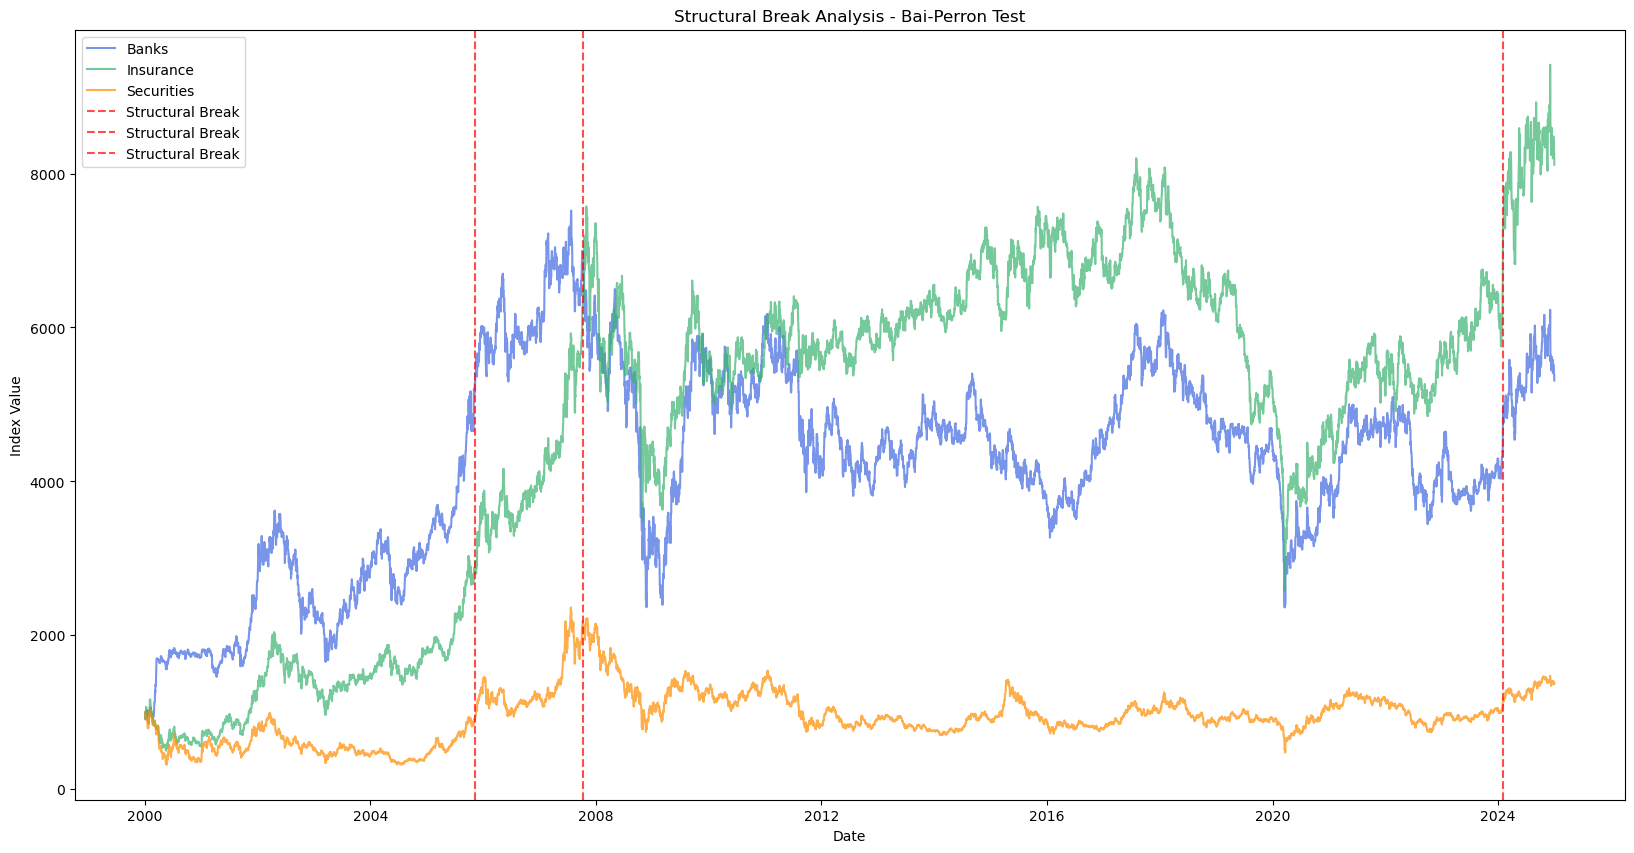

In [37]:
import matplotlib.pyplot as plt

# üìå Ïó∞Ìïú ÏÉâÏÉÅ ÏÑ§Ï†ï (alpha Í∞í Ï°∞Ï†à)
colors = ['royalblue', 'mediumseagreen', 'darkorange']  # Í∏∞Î≥∏ ÏÉâÏÉÅ
alpha_value = 0.7  # Ìà¨Î™ÖÎèÑ ÏÑ§Ï†ï (0.0 ~ 1.0, Í∞íÏù¥ ÎÇÆÏùÑÏàòÎ°ù Ïó∞Ìïú ÏÉâ)

plt.figure(figsize=(20, 10))

# üìå Í∞Å Í∏àÏúµ ÏßÄÏàòÎ•º Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú ÌîåÎ°Ø (Ïó∞Ìïú ÏÉâ Ï†ÅÏö©)
for i, col in enumerate(target_var):
    plt.plot(df['Date'], df[col], label=col, color=colors[i], alpha=alpha_value)

# üìå Íµ¨Ï°∞Ï†Å Î≥ÄÎèô ÏßÄÏ†ê ÌëúÏãú (Î∂âÏùÄÏÉâ Ï†êÏÑ†)
for bp in breakpoints[:-1]:  # ÎßàÏßÄÎßâ ÏßÄÏ†ê Ï†úÏô∏
    plt.axvline(df['Date'].iloc[bp], color='red', linestyle='--', alpha=0.7, label="Structural Break")

plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("Structural Break Analysis - Bai-Perron Test")
plt.legend()

# üìå Í∑∏ÎûòÌîÑ Ï†ÄÏû• (ÌååÏùºÎ™Ö: structural_break_analysis.png)
plt.savefig("structural_break_analysis.png", dpi=600, bbox_inches='tight')

# üìå Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()

In [33]:
# üìå ÏÑ†ÌÉùÎêú Íµ¨Ï°∞Ï†Å Î≥ÄÎèô ÏßÄÏ†ê(ÎÇ†Ïßú) ÌôïÏù∏
structural_break_dates = df['Date'].iloc[breakpoints[:-1]]  # ÎßàÏßÄÎßâ Í∞í Ï†úÏô∏
print("üìå Structural Breaks Detected at:")
print(structural_break_dates.to_list())  # Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ°ú Ï∂úÎ†•


üìå Structural Breaks Detected at:
[Timestamp('2005-11-08 00:00:00'), Timestamp('2007-10-09 00:00:00'), Timestamp('2024-02-02 00:00:00')]
